In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("F:\My own AI project is starting\DA+BI\customer_churn_dataset(AutoRecovered).xlsx")
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,...,churn,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,0,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,0,0,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,61,80.24,4894.64,One year,Cash,Fiber,1,1,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,0,0,4,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(20000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          20000 non-null  int64  
 1   tenure               20000 non-null  int64  
 2   monthly_charges      20000 non-null  float64
 3   total_charges        20000 non-null  float64
 4   contract             20000 non-null  object 
 5   payment_method       20000 non-null  object 
 6   internet_service     17987 non-null  object 
 7   tech_support         20000 non-null  int64  
 8   online_security      20000 non-null  int64  
 9   support_calls        20000 non-null  int64  
 10  Support_calls_group  20000 non-null  object 
 11  churn                20000 non-null  int64  
 12  Unnamed: 12          0 non-null      float64
 13  Unnamed: 13          0 non-null      float64
 14  Unnamed: 14          0 non-null      float64
 15  Unnamed: 15          0 non-null     

In [6]:
df.describe()

,customer_id,tenure,monthly_charges,total_charges,tech_support,online_security,support_calls,churn,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,0.0,0.0,0.0,0.0,0.0
mean,10000.500000,36.467450,70.010531,2543.979209,0.348450,0.399600,1.51255,0.342150,NaN,NaN,NaN,NaN,NaN
std,5773.647028,20.773984,28.890239,1882.949804,0.476491,0.489828,1.23524,0.474441,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,20.000000,20.230000,0.000000,0.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5000.750000,18.000000,45.210000,1045.837500,0.000000,0.000000,1.00000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,10000.500000,36.000000,70.090000,2096.495000,0.000000,0.000000,1.00000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,15000.250000,54.000000,95.072500,3690.337500,1.000000,1.000000,2.00000,1.000000,NaN,NaN,NaN,NaN,NaN
max,20000.000000,72.000000,120.000000,8629.920000,1.000000,1.000000,8.00000,1.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
df['churn'].value_counts()

churn
0    13157
1     6843
Name: count, dtype: int64

In [9]:
df['churn'].value_counts(normalize=True) * 100

churn
0    65.785
1    34.215
Name: proportion, dtype: float64

In [12]:
bins = [0, 12, 24, 36, 48, 60, 100]
labels = ['0-12', '12-24', '25-36', '37-48', '49-60', '60+']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)
df[['tenure', 'tenure_group']].head(10)

,tenure,tenure_group
0,52,49-60
1,15,12-24
2,72,60+
3,61,60+
4,21,12-24
5,24,12-24
6,3,0-12
7,22,12-24
8,53,49-60
9,2,0-12


In [13]:
churn_by_tenure = pd.crosstab(
    df['tenure_group'],
    df['churn'],
    normalize = 'index',
) * 100

churn_by_tenure

churn,0,1
tenure_group,,
0-12,53.704838,46.295162
12-24,67.578462,32.421538
25-36,67.389976,32.610024
37-48,68.237082,31.762918
49-60,68.244634,31.755366
60+,69.284415,30.715585


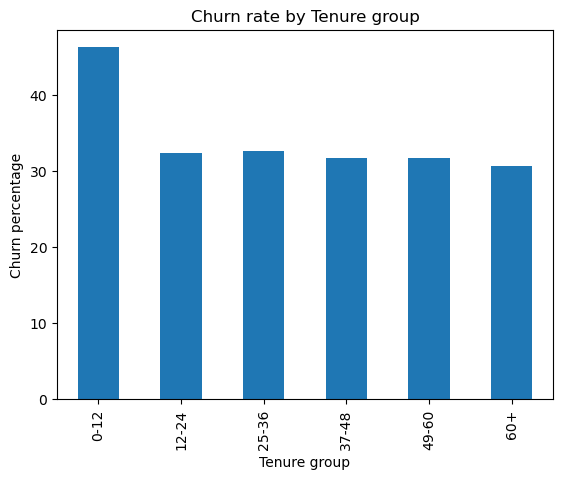

In [21]:
churn_by_tenure[1].plot(kind='bar')
plt.title("Churn rate by Tenure group")
plt.ylabel("Churn percentage")
plt.xlabel("Tenure group")
plt.show()

## Key insights
- Customers in the first 0-12 months show the highest churn rate.
- Churn consistently decreases as tenure increases.
- Early stage customer retention is critical

## Recommendations
- Improve onboarding and engagement during the first year.
- Identify high risk customers early using tenure based rules.